# 01: MNIST Dataset Exploration
The goal of this notebook is the exploration of the MNIST dataset. I want to take a look at both the traditional "Number" MNIST dataset and the new "Fashion" MNIST dataset. Furthermore, applying deep learning to these datasets makes a lot of sense since the data is unstructured and we need to learn a representation or new features. With these new features encoded in matrices we can then train our neural network and make new predictions.

## Number MNIST

In [1]:
# TODO: Implement the Number MNIST part

## Fashion MNIST
Here again we need some imports from tensorflow and keras to be able to train our networks. You can find all Keras API provided datasets at https://keras.io/datasets/. The Fashion MNIST dataset has been created by Zalando and they aim to replace the original Number dataset. In fact, the original Number MNIST dataset seems to be too easy. In addition, researchers say that the dataset makes no general statement about the performance of a CV algorithm because in certain cases you only need to have one pixel to recognize which number it is. To replace the old MNIST dataset the researchers created this new dataset with fashion articles. However, the shape of the input and output dimension is the same.

In [22]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

#### Preprocessing
First, we need to load the dataset. Luckily, the Keras API provides us with a data loader for the fashion MNIST dataset as well. The dataset comes in two separate sets for training the neural network and testing its performance. Just like the number MNIST dataset this dataset also has 10 different labels/classes. To feed the images into our neural networks it makes sense to normalize the data. We do this by scaling all the values to the range between 0 and 1.0. 

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [5]:
train_images = train_images / 255
test_images = test_images / 255

#### Visualizations
First, we want to take a look at a single image and see how the grayscaled images look like. To visualize the raw data we take teh first image from our training set and feed it to a pyplot of matplotlib. The first image obviosly shows an ankle boot. 

Secondly, we want to take a look at multiple images and see what characteristics they show. As you can see in the second figure below there are many different fashion articles. Some of them look pretty similar and even with the human eye you sometimes cannot classify an fashion article to the right category.

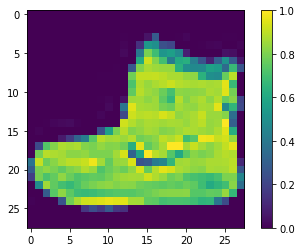

This image shows: Ankle boot


In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
print("This image shows:", class_names[train_labels[0]])

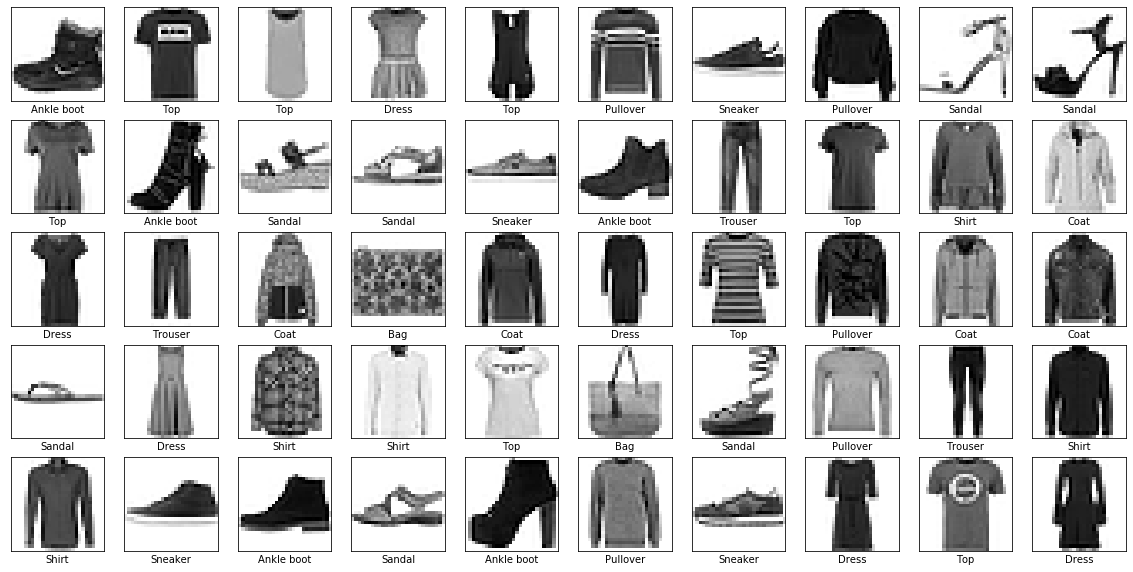

In [7]:
plt.figure(figsize=(20,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### Neural Network Architecture

Now that we know how the dataset looks like we can start training our first neural network. To do so we need to reshape the input image matrices to have a fourth dimension. The first dimension denotes the number of images, while the second and third one denote the width and height of the image. If we had an image with size 50 x 50 pixels that would mean that we need to reshape it to 60000 x 50 x 50 x 1. The fourth dimension holds the grayscale value at a certain position within the image. If we had an RGB image we would need to make the foruth dimension to be of size 3. 

After reshaping our inputs we need to define the architecture of the neural network. In this case we use the Sequential API of Keras which allows you to add multiple layers to your neural network. The most important part here is the dimension of the input layer to your neurakl network. It is important that you do not specify the batch size because your neural network should handle any batch size during training. The dimensions of the tensors in the following layers is computed automatically. 

The last important step is defining the output layer of our neural network. Since we want to get all the probabilities of the input image belonging to each of the 10 classes we need a vector of size 10 to be the output. As activation function we choose the softmax. It will output a probability distribution based on the K input values from the last hidden layer. The probabilities are proportianal to the exponentials of the input values. As a result, all probabilities are in range of 0 to 1 and they all sum up to 1.

In [8]:
train_images = train_images.reshape((60000,28,28,1))
train_images.shape

(60000, 28, 28, 1)

In [9]:
test_images = test_images.reshape((10000,28,28,1))
test_images.shape

(10000, 28, 28, 1)

In [10]:
model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#### Compiling and Training

The final step before starting the training process is specifying the optimizer, the loss function and the metrics that we want to keep track of during training. In our case we picked the Adam optimizer because it is a better version of stochastic gradient descent. Finally, we also want to keep track of the accuracy during training time. We train the network in 4 epochs and with a batch size of 64 tto ensure that the gradient is less noisy.

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(train_images,train_labels, epochs=4, batch_size=64)

Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 52s 873us/sample - loss: 0.3818 - accuracy: 0.8615
Epoch 2/4
60000/60000 [==============================] - 53s 877us/sample - loss: 0.2362 - accuracy: 0.9130
Epoch 3/4
60000/60000 [==============================] - 52s 869us/sample - loss: 0.1732 - accuracy: 0.9357
Epoch 4/4
60000/60000 [==============================] - 52s 872us/sample - loss: 0.1188 - accuracy: 0.9554


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)


Test loss: 0.24864505399763584

Test accuracy: 0.9169


#### Analysis
Now we want to take a look at the performance of our classiifier. For example, we expect that some fashion articles might be harder to recognize or might look very similar to the neural networks compared to certain fashion items. Now we want to use pandas and matplotlib to understand what our neurakl network actually is doing.

To get predictions for our new images we can invoke the predict function of our model. The output will be a tensor with 10 probabilities for each sample. To get the predicted label we can then take the argmax of the 10 probabilities. Finally, we store the predictions in a pandas dataframe.

In [74]:
predicted_labels = model.predict(test_images)
predicted_labels.shape

(10000, 10)

In [75]:
predictions = np.argmax(predicted_labels, axis=1)
predictions.shape

(10000,)

In [76]:
results = pd.DataFrame()
results["predicted_label"] = predictions
results["actual_label"] = test_labels
results.head()

,predicted_label,actual_label
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6


Figure shows number of misclassifications per category


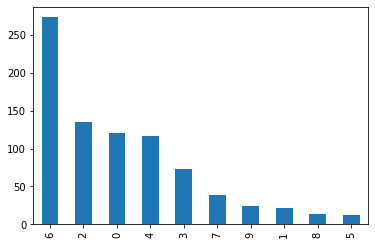

In [81]:
misclassifications = results.loc[results["actual_label"] != results["predicted_label"]]
actual_counts = misclassifications["actual_label"].value_counts()
actual_counts.plot.bar()
print("Figure shows number of misclassifications per category")

Figure shows counts of predicted labels for items that are actually shirts


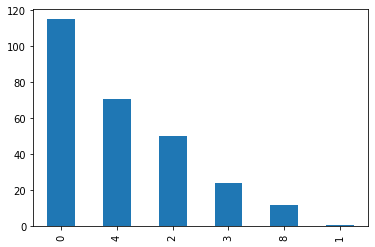

In [85]:
class_shirt = misclassifications[misclassifications["actual_label"] == 6]
class_shirt["predicted_label"].value_counts().plot.bar()
print("Figure shows counts of predicted labels for items that are actually shirts")

What we can see from that data is that label 6 which is the class of shirts is pretty hard to predict. This might be because the shirt looks pretty much like a pullover or t-shirt. This assumption is supported by the data as well because the most misclassifications are caused by tops (0), pullovers(2), shirts(6) and coats(4). Furthermore we can see that dresses, trousers and bags also contribute to misclassifications of shirts but not as much as the already mentioned items.

## Takeaways
1. One of the first takeaways is that it is important what kind of loss function you are using in this specific problem. You can either choose the sparse_categorical_crossentropy loss or the categorical_crossentropy loss. You may have noticed that we used these two different loss functions for both datasets. The main difference is how we specify and shape our tensors that contain the labels for the specific images. For example, if you use the sparse categorical crossentropy loss the network expects to get a single value at the final output layer to calculate the error. This value is an integer which denotes the different output classes. If you want to use the standard categorical crossentropy loss you need to one-hot-encode the labels. you can do that with the following code snippet.

```python
 from tensorflow.keras.utils import to_categorical
 train_labels = to_categorical(train_labels)
```